In [1]:
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [2]:
election = pd.read_csv("election_data.csv")
election.head()

,Election-id,Result,Year,Amount Spent,Popularity Rank
0,NaN,NaN,NaN,NaN,NaN
1,122.0,0.0,32.0,3.81,3.0
2,315.0,1.0,48.0,6.32,2.0
3,201.0,1.0,51.0,3.67,1.0
4,965.0,0.0,40.0,2.93,4.0


In [3]:
election.columns

Index(['Election-id', 'Result', 'Year', 'Amount Spent', 'Popularity Rank'], dtype='object')

In [4]:
# 1st row is empty we have to remove it
election.drop(0, axis = 0, inplace = True)

In [5]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 1 to 10
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Election-id      10 non-null     float64
 1   Result           10 non-null     float64
 2   Year             10 non-null     float64
 3   Amount Spent     10 non-null     float64
 4   Popularity Rank  10 non-null     float64
dtypes: float64(5)
memory usage: 532.0 bytes


In [6]:
# election id is irrelavant
# Result is the target column

In [7]:
election.shape

(10, 5)

In [8]:
election.drop('Election-id', axis = 1, inplace = True)

<AxesSubplot:xlabel='Result', ylabel='count'>

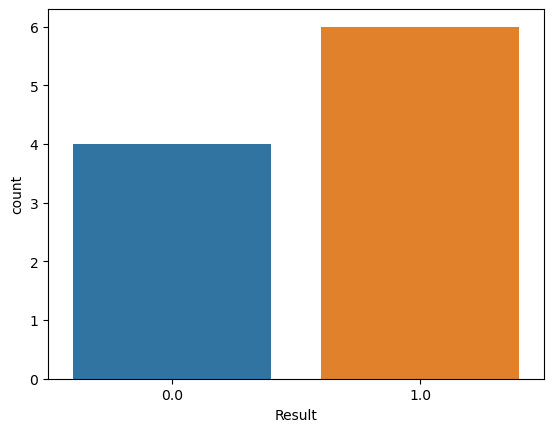

In [9]:
# we have only 10 rows - so we cannot split it between train and test as it wont give ggod result
sns.countplot(election['Result'])
# the target column is split 40 - 60 ratio, so it is balanced

In [10]:
target = election['Result']
predictors = election.drop('Result', axis = 1)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = scaler.fit_transform(predictors)

In [12]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_predictors, target)

LogisticRegression()

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



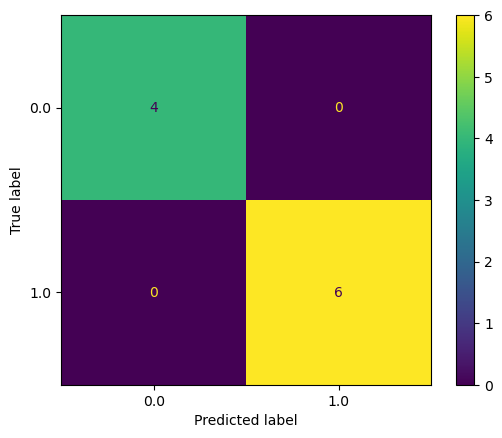

In [13]:
### Checking accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

y_pred = log_model.predict(scaled_predictors)

confusion_matrix(target, y_pred)
plot_confusion_matrix(log_model, scaled_predictors, target)
print(classification_report(target, y_pred))

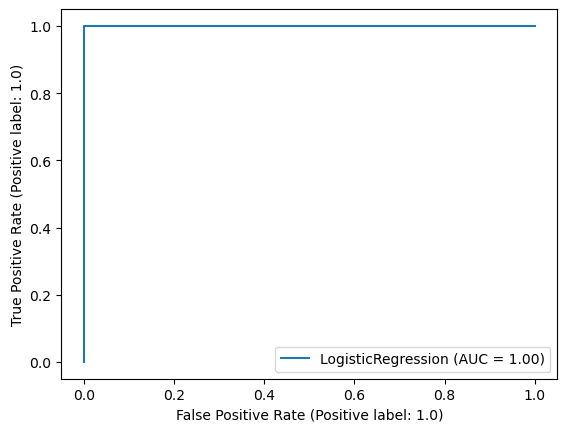

In [14]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model, scaled_predictors, target)

In [15]:
coefs = pd.Series(index = predictors.columns, data = log_model.coef_[0])
coefs
# Coefficients of the predictor variables

Year               0.508922
Amount Spent       0.265231
Popularity Rank   -1.206429
dtype: float64

In [ ]:
#### We get accuracy of 100% on the training dataset
## since this dataset is very small we cannot split it between train and test
## therfore we cannot truly test this model unless more information is available